# Election Data Analysis - Polls Data Set

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

from __future__ import division


In [4]:
import requests
from StringIO import StringIO

In [4]:
url="http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

In [5]:
poll=requests.get(url).text

In [36]:
pollframe=StringIO(poll)

In [37]:
pollframe=pd.read_csv(pollframe)

In [9]:
pollframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 588
Data columns (total 14 columns):
Pollster                  589 non-null object
Start Date                589 non-null object
End Date                  589 non-null object
Entry Date/Time (ET)      589 non-null object
Number of Observations    567 non-null float64
Population                589 non-null object
Mode                      589 non-null object
Obama                     589 non-null int64
Romney                    589 non-null int64
Undecided                 422 non-null float64
Pollster URL              589 non-null object
Source URL                587 non-null object
Partisan                  589 non-null object
Affiliation               589 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 69.0+ KB


In [10]:
pollframe.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06 2000-01-01 08:40:26 UTC,1000,Likely Voters,Live Phone,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05 2000-01-01 18:30:15 UTC,3000,Likely Voters,Live Phone,49,48,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06 2000-01-01 09:22:02 UTC,872,Likely Voters,Automated Phone,48,48,4,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06 2000-01-01 07:38:41 UTC,1041,Likely Voters,Internet,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06 2000-01-01 08:47:50 UTC,1500,Likely Voters,Automated Phone,48,49,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None


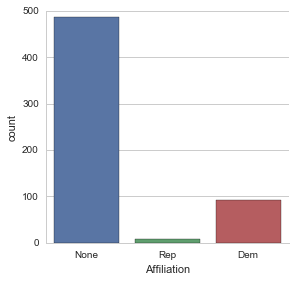

In [12]:
# Lets check the party affiliation of the polls
sns.factorplot("Affiliation",data=pollframe,kind="count")


This visual shows  neutral affiliation , but still leaning towards Democratic party....lets check it with Population hue..

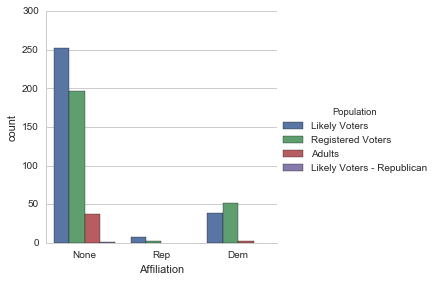

In [13]:
sns.factorplot("Affiliation",hue="Population",data=pollframe,kind="count")

Large showing of likely and registered voters in all the parties...

In [14]:
#Lets take a quick overview of the data frame...
pollframe.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06 2000-01-01 08:40:26 UTC,1000,Likely Voters,Live Phone,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05 2000-01-01 18:30:15 UTC,3000,Likely Voters,Live Phone,49,48,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06 2000-01-01 09:22:02 UTC,872,Likely Voters,Automated Phone,48,48,4,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06 2000-01-01 07:38:41 UTC,1041,Likely Voters,Internet,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06 2000-01-01 08:47:50 UTC,1500,Likely Voters,Automated Phone,48,49,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None


Lets have a visual of the averages for Obama and Romney and Undecided polls..

In [19]:
# lets calculate the averages first...
pollavg=pd.DataFrame(pollframe.mean())
pollavg.drop("Number of Observations",axis=0,inplace=True)

# Calculating the standard deviations...
pollstd=pd.DataFrame(pollframe.std())
pollstd.drop("Number of Observations",axis=0,inplace=True)

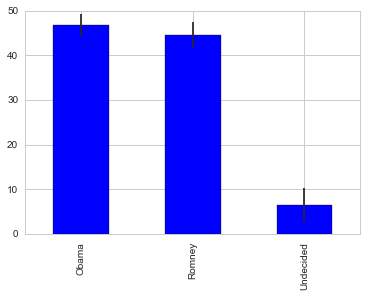

In [21]:
# Lets have a visual of the average polls for Obama , Romney and Undecided with the error rate as the yerr...
pollavg.plot(yerr=pollstd,kind="bar",legend=False)

The plot shows a very close race between Obama and Romney ....Both are within the standard deviations of each other...so, a lot depends on the undecided factor....

In [22]:
#Lets concatanate the average and standard deviation dataframes
pollavg=pd.concat([pollavg,pollstd],axis=1)

pollavg.columns=["Average","Std"]

pollavg

,Average,Std
Obama,46.772496,2.448627
Romney,44.573854,2.927711
Undecided,6.549763,3.702235


Just like the above graph shows , the table confirms that the undecided factor is playing the crucial role in the race here..
Even if we divide the numbers symmetrically the observed difference will be the unbiased estimator of the winning candidate.

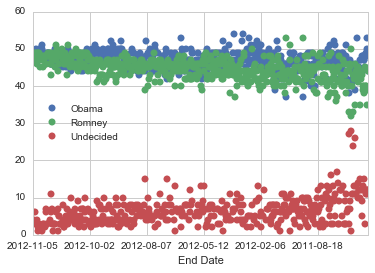

In [38]:
#lets quickly plot the sentiments of the polls with time in reverse order...
pollframe.plot(x="End Date",y=["Obama","Romney","Undecided"],marker="o",linestyle="")

The above visual shows that with time the undecided polls narrowed down and there has been a gradual surge in the numbers for both Obama and Romney..


In [39]:
#Adding a difference column in the pollframe to calculate the difference between polls for Obama and Romney over time..
pollframe["Difference"]=(pollframe.Obama-pollframe.Romney)/100

In [40]:
# Taking a sneak peek in the data..
pollframe.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06 2000-01-01 08:40:26 UTC,1000,Likely Voters,Live Phone,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,0.00
1,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05 2000-01-01 18:30:15 UTC,3000,Likely Voters,Live Phone,49,48,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None,0.01
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06 2000-01-01 09:22:02 UTC,872,Likely Voters,Automated Phone,48,48,4,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,0.00
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06 2000-01-01 07:38:41 UTC,1041,Likely Voters,Internet,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep,0.00
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06 2000-01-01 08:47:50 UTC,1500,Likely Voters,Automated Phone,48,49,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,-0.01


In [41]:
#There are mutiple rows with the same start date and we want to analyse the difference of the polls with Start data ...
#So, lets use group by to first group the polls with start date and then plot the visual...

pollframe=pollframe.groupby(["Start Date"],as_index=False).mean()

In [42]:
pollframe.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Difference
0,2009-03-13,1403,44,44,12,0.00
1,2009-04-17,686,50,39,11,0.11
2,2009-05-14,1000,53,35,12,0.18
3,2009-06-12,638,48,40,12,0.08
4,2009-07-15,577,49,40,11,0.09


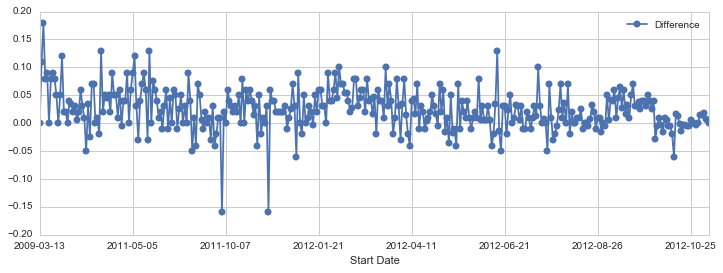

In [43]:
#Now plotting the difference of polls between Obama and Romney vs time....
pollframe.plot("Start Date","Difference",figsize=(12,4),marker="o",linestyle="-")

A positive difference means Obama was leading and a negative favours Romney.... As,we can see there has been a drop in the difference two times in October...Recalling the debates were held on Oct 3rd, Oct 11 and Oct 22nd...So, lets plot some marker lines for these dates and gather more insights by zooming in the month of October.

In [47]:
# The following code calculated the index for October month, so that we can put xlimits for the plot to zoom October month...

row_in=0
xlimit=[]

for date in pollframe["Start Date"]:
    if date[0:7] == "2012-10":
        xlimit.append(row_in)
        row_in=row_in + 1
    else :
        row_in = row_in +1
    
print min(xlimit)
print max(xlimit)

    

329
356


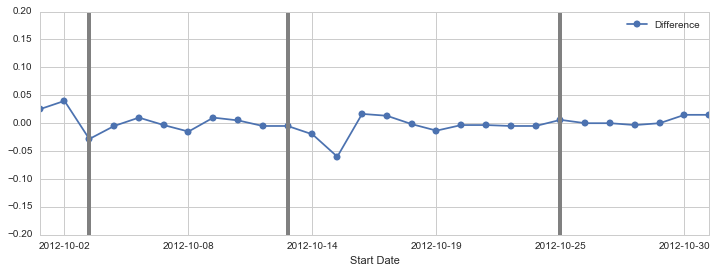

In [50]:
# Now lets plot and set the marker lines...

fig = pollframe.plot("Start Date","Difference",figsize=(12,4),marker="o",linestyle="-",xlim=(min(xlimit),max(xlimit)))
plt.axvline(x=329+2,linewidth=4,color="grey")
plt.axvline(x=329+10,linewidth=4,color="grey")
plt.axvline(x=329+21,linewidth=4,color="grey")

Surprisingly the visual shows a dip in the performance of Obama against Romney after the Second debate...but recalling the memory, Obama did much worse against Romney after the first debate itself...

Looking at the above results, lets not forget to consider the impact of geographical location on the outcome of the national election...

# Election Data Analysis - Donor Data Set

In [4]:
# Reading the csv dataset into a DataFrame
donorframe=pd.read_csv("Election_Donor_Data.csv")

In [54]:
# Getting the info
donorframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 129.9+ MB


In [55]:
# Lets take a glimpse of the dataset
donorframe.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300,20-JUN-11,NaN,NaN,NaN,SA17A,736166


Now, lets think of the question to check how much was donated and what was the average donation..

In [56]:
#Looking at the value counts for donation amounts...
donorframe["contb_receipt_amt"].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 236.07          1
 153.60          1
 116.35          1
 233.33          1
 86.21           1
 600.74          1
 130.20          1
 50.04           1
 78.55           1
 266.10          1
 77.83           1
 222.75          1
 217.75          1
 261.50          1
 240.25          1
-45.50           1
 161.50          1
 268.76          1
 100.56          1
 6.26            1
 114.43          1
 823.88     

In [57]:
# Lets check the mean donation and the standard deviation
mean_don=donorframe["contb_receipt_amt"].mean()

std_don=donorframe["contb_receipt_amt"].std()

In [58]:
print "mean donation  : %.2f" %(mean_don)
print "standard deviation : %.2f" %(std_don)

mean donation  : 298.24
standard deviation : 3749.67


Thats a huge standard deviation..lets check to see the distribution of donations...

In [64]:
# Copying the dontion amount into a Series
top_don=donorframe["contb_receipt_amt"].copy()

In [60]:
# Sorting the values
top_don.sort_values()

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
33821       -5414.31
908565      -5115.00
456649      -5000.00
574657      -5000.00
30513       -5000.00
562267      -5000.00
30584       -5000.00
86268       -5000.00
708920      -5000.00
665887      -5000.00
708899      -5000.00
708929      -5000.00
21172       -5000.00
21168       -5000.00
21167       -5000.00
262328      -5000.00
946875      -5000.00
7361        -5000.00
416403      -5000.00
21164       -5000.00
707945      -5000.00
615101      -5000.00
7973        -5000.00
54430       -5000.00
54434       -5000.00
             ...    
708022      10000.00
708898      10000.00
710177      10000.00
876244      10000.00
709608      10000.00
708919      10000.00
709739      10000.00
91145       10000.00
708138      10000.00
993178      10000.00
709813      10000.00
710730      10000.00
708928      10000.00
709268      10000.00
99829       10000.00
90076       10000.00
709859      1

In [65]:
# Selecting only positive donations
top_don=top_don[top_don>0]

# Sorting again
top_don.sort_values()

# looking at the top 10 donation amounts
top_don.value_counts().head(10)

100     178188
50      137584
25      110345
250      91182
500      57984
2500     49005
35       37237
1000     36494
10       33986
200      27813
Name: contb_receipt_amt, dtype: int64

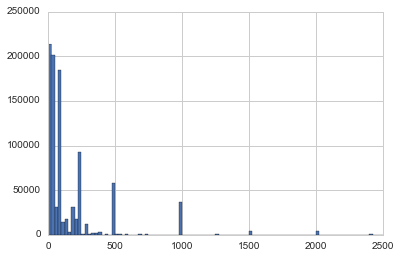

In [77]:
# Normally donations occur in round number values....Lets check to see the common donations below 2500 and see if there are spikes
common_don=top_don[top_don<2500]
common_don.hist(bins=100)

Looking at the above donations histogram....we can see spikes in round figure donations....So, our intuition was correct that people usually donate in round figure...

In [78]:
#Getting the unique candidates
candidature=donorframe.cand_nm.unique()

In [79]:
#Lets have a look at the candidates
candidature

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

Obama is from Democartic party and others are from Republican ...so, let go ahead and seperate all the candidates on the basis
of their party affiliation using mapping technique..

In [5]:
# Creating a dictionary of party affiliations...
mapping_party = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

donorframe["Party"]=donorframe.cand_nm.map(mapping_party)

In [82]:
# Lets check if the party column was added successfully
donorframe.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [6]:
# Getting rid of the negative values in contb_receipt_amt....that is clearing refunds
donorframe=donorframe[donorframe.contb_receipt_amt>0]

In [93]:
#Take a glimpse
donorframe.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [7]:
# Checking out the total no. of people who donated for different candidates
donorframe.groupby("cand_nm")["contb_receipt_amt"].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

The above counts confirm that Barack Obama was the front runner in the race whoch makes sense as he was the only democratic candidate...

In [8]:
#Lets check the amount donated in dollars per candidate...
amt_candidate=donorframe.groupby("cand_nm")["contb_receipt_amt"].sum()

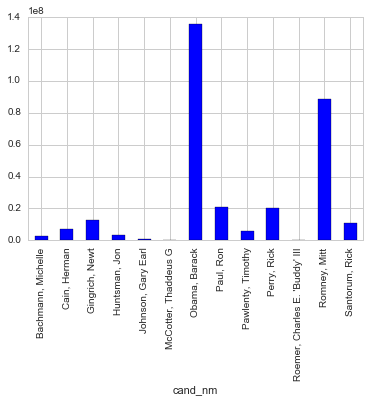

In [9]:
amt_candidate.plot(kind="bar")

The plot is in concord with our understanding from the counts...the highest donation for Obama.

In [10]:
# Lets go ahead and see how did the donations vary by Party...
#Grouping the dataset by Party column now..

amt_party=donorframe.groupby("Party")["contb_receipt_amt"].sum()

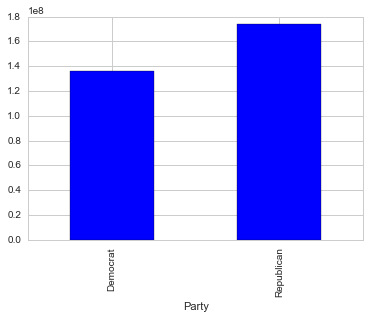

In [11]:
# Plotting the data
amt_party.plot(kind="bar")

Yes... Obama could not compete with Republicans in terms of donations....but it should be noted that it was just Obama from Democartic party and donation amout for Republicans however big it was was divided among many candidates.

In [107]:
donorframe.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


Now lets look at the donations on the basis of occupations and the party they belong to...

In [12]:
# Lets start by taking the occupation column from the donorframe and use a pivot table to make the index defined by various 
# occupations and have the columns defined by Party column(Democratic and Republican)

# Pass an aggfunc sum to the pivot_table to sum the donations of the people with the same occupation.
occuframe=donorframe.pivot_table("contb_receipt_amt",
                                index="contbr_occupation",
                                columns="Party",
                                aggfunc="sum")

In [13]:
#Lets take a sneak peek at the occuframe tuple
occuframe.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100,NaN
AREA VICE PRESIDENT,250,NaN
RESEARCH ASSOCIATE,100,NaN
TEACHER,500,NaN
THERAPIST,3900,NaN


In [10]:
#Checking out the rows the columns
occuframe.shape

(45073, 2)

Thats a huge no.of rows and will be difficult to visualize in the small static visual.so lets cut off for total contributions 
amount to 1000000...

In [11]:
occuframe.sum()

Party
Democrat      1.268252e+08
Republican    1.677015e+08
dtype: float64

In [14]:
occuframe=occuframe[occuframe.sum(1)>1000000]

In [13]:
occuframe.shape

(31, 2)

That number can be visualized properly...

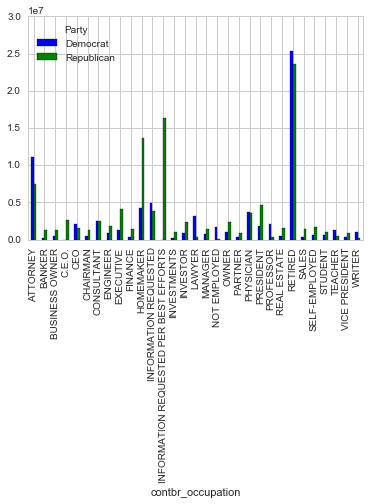

In [15]:
# Plotting the data now...
occuframe.plot(kind="bar")

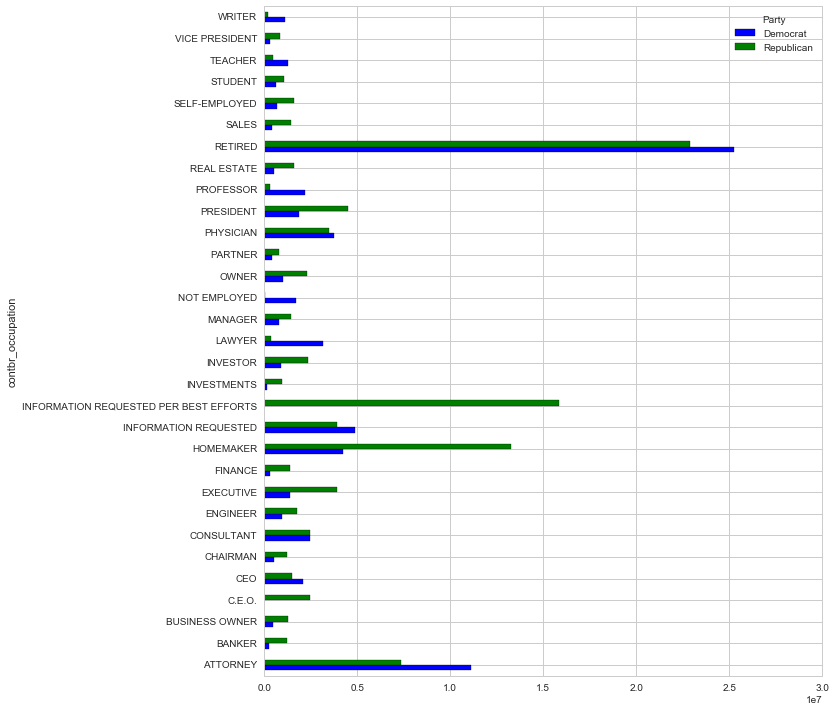

In [16]:
# Plotting on a horizontal axis...
occuframe.plot(kind="barh",figsize=(10,12))

In [16]:
# Dropping the unavailable occupations...
occuframe.drop(["INFORMATION REQUESTED PER BEST EFFORTS","INFORMATION REQUESTED"],axis=0,inplace=True)


# Taking care of mislabled columns...
occuframe.loc["CEO"]=occuframe.loc["CEO"]+occuframe.loc["C.E.O."]
occuframe.drop("C.E.O.",inplace=True)

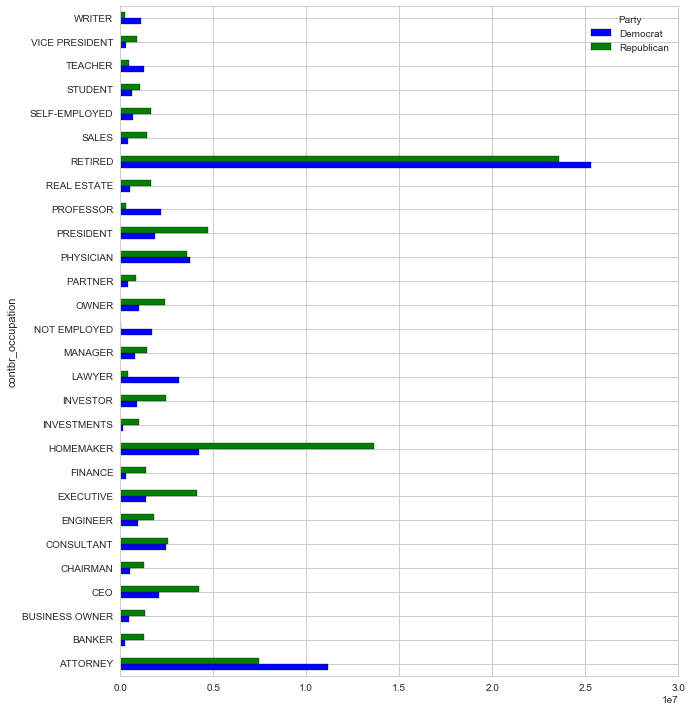

In [18]:
occuframe.plot(kind="barh",figsize=(10,12))

So, the highest donation amout came from retired personal for Democratic Party(Obama) and the second highest from retired personal for Republican Party...CEOs, Sef Employeds, Presidents, Owners , Bankers are leaning more towards Republicans(conservative right leaning)....may be due to taxation philosophy of Republicans vs Democrats...